#Data Science Career Track (Springboard/DataCamp)
#Topic:   Capstone Project - 911 Police Calls for Service EDA, (Baltimore, MD)
#Student: Franklin Cid
#Mentor:  Milad Toutounchian

#0 Import packages and visualization libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#1 read 911 calls

In [2]:
c911 = pd.read_csv('Data/w911PoliceCalls_BaltimoreMD.csv')

#2 Pull c911 into a df, just including needed columns, and set the index. Change col name 'description' to 'callType' (reason for the call).

In [3]:
df911 = pd.DataFrame(c911, columns=['callDateTime', 'priority', 'district', 'description'])
df911.columns = df911.columns.str.replace('description','callType')
df911.head(6) #chk

,callDateTime,priority,district,callType
0,08/10/2017 03:25:00 PM,Low,ND,LARCENY
1,08/23/2017 12:53:00 PM,Medium,NE,911/NO VOICE
2,08/07/2017 06:57:00 PM,Medium,ED,911/NO VOICE
3,08/18/2017 09:05:00 PM,Low,NW,AUTO ACCIDENT
4,06/27/2015 03:12:00 PM,Non-Emergency,ND,LOUD MUSIC
5,08/23/2017 10:09:00 AM,High,NW,AUDIBLE ALARM


#3 Cast callDateTime => dateTime (no date fx available), new col=dT

In [ ]:
#import timeit %timeit 
df911['dT'] =pd.to_datetime(df911.callDateTime)
df911.head(6) #chk run1 = 15-min; ? 2:36 - 2:52 = 16 min

In [7]:
#devMode: 
dev = 0 # [0, 1, 2]; 0=init, default 1=dev, 2=prod 
csvDT = 'Data/w911PoliceCalls_BaltimoreMD_dt.csv'
if dev == 0:
    df911.to_csv(csvDT, sep=',', encoding='utf-8')
if dev == 1:  #START HERE in this block
    c911 = pd.read_csv(csvDT, 'r')
    columns=['priority', 'district', 'callType', 'dT']
    df911 = pd.DataFrame(c911, columns=cols)
    df911['callDateTime'] = ''
else:
    dev = dev  #do NOTHING
    
df911dT = df911.copy()   # df911 = df911dT.copy()
df911dT.head(6) #chk run1 = 15-min; ? 2:36 - 2:52 = 16 min

,callDateTime,priority,district,callType,dT
0,08/10/2017 03:25:00 PM,Low,ND,LARCENY,2017-08-10 15:25:00
1,08/23/2017 12:53:00 PM,Medium,NE,911/NO VOICE,2017-08-23 12:53:00
2,08/07/2017 06:57:00 PM,Medium,ED,911/NO VOICE,2017-08-07 18:57:00
3,08/18/2017 09:05:00 PM,Low,NW,AUTO ACCIDENT,2017-08-18 21:05:00
4,06/27/2015 03:12:00 PM,Non-Emergency,ND,LOUD MUSIC,2015-06-27 15:12:00
5,08/23/2017 10:09:00 AM,High,NW,AUDIBLE ALARM,2017-08-23 10:09:00


##4 Set the INDEX and SORT before filtering the target datasets. Also, make a df copy with dT.
#a) dfCallTypeDistrict (Jan/2015, Jan/2016, Jan/2017; daily totals), and 
#b) dfPriority (full years of 2015, 2016, 2017; monthly totals)

In [9]:
#df911dT = df911.copy() #TEST: copy with dT
#df911 = df911dT.copy() #TEST: 
df911.set_index('dT', drop=True)
df911.sort_values(by='dT', inplace=True)
df911.head(6) #chk

,callDateTime,priority,district,callType,dT
1106565,01/01/2015 12:01:00 AM,High,NW,Dischrg Firearm,2015-01-01 00:01:00
357881,01/01/2015 12:01:00 AM,High,SW,Shooting,2015-01-01 00:01:00
359329,01/01/2015 12:01:00 AM,Low,SW,Other,2015-01-01 00:01:00
359125,01/01/2015 12:02:00 AM,Low,SW,Subject stop,2015-01-01 00:02:00
359340,01/01/2015 12:02:00 AM,High,SW,Dischrg Firearm,2015-01-01 00:02:00
358628,01/01/2015 12:02:00 AM,High,NE,Dischrg Firearm,2015-01-01 00:02:00


#5 Create needed columns for manipulating/grouping data later.
#Calculate the dateparts for yr, mo, and dy.
#Now, Drop callDateTime col.

In [10]:
df911['yr'] = ''; df911['mo'] = ''; df911['dy'] = ''
df911.yr = pd.DatetimeIndex(df911.dT).year
df911.mo = pd.DatetimeIndex(df911.dT).month
df911.dy = pd.DatetimeIndex(df911.dT).day
df911.tail() #chk

,callDateTime,priority,district,callType,dT,yr,mo,dy
2492563,10/10/2018 11:43:00 AM,Low,NE,ESCORT,2018-10-10 11:43:00,2018,10,10
2492696,10/10/2018 11:44:00 AM,Medium,ED,DISORDERLY,2018-10-10 11:44:00,2018,10,10
2492673,10/10/2018 11:44:00 AM,Low,NW,CHECKWELLBEING,2018-10-10 11:44:00,2018,10,10
2492546,10/10/2018 11:45:00 AM,Medium,NE,FAMILY DISTURB,2018-10-10 11:45:00,2018,10,10
2492589,10/10/2018 11:45:00 AM,High,NE,SILENT ALARM,2018-10-10 11:45:00,2018,10,10


In [12]:
#Drop callDateTime col now.
df911 = df911.drop('callDateTime', axis=1) #3858058 rows × 7 columns
df911.tail() #chk

,priority,district,callType,dT,yr,mo,dy
2492563,Low,NE,ESCORT,2018-10-10 11:43:00,2018,10,10
2492696,Medium,ED,DISORDERLY,2018-10-10 11:44:00,2018,10,10
2492673,Low,NW,CHECKWELLBEING,2018-10-10 11:44:00,2018,10,10
2492546,Medium,NE,FAMILY DISTURB,2018-10-10 11:45:00,2018,10,10
2492589,High,NE,SILENT ALARM,2018-10-10 11:45:00,2018,10,10


In [14]:
#6 #Data wrangle: df911
##6a Filter: 01/2015 - 12/2017 (3 full years)
##6b Empty/NaN/NULL 
##6c Uppercase/Lowercase - make all CallTypes Upper()
##6d Mistyped - extra space, 
##6e Work only on top 5 district
##6f Work only on top 4 priority 
##6g Work only on top 5 callType

In [15]:
##6a Filter: 01/2015 - 12/2017 (3 full years)
df911 = df911.loc[(df911.dT >= '01/2015') & (df911.dT < '01/2018')]
df911.tail()

,priority,district,callType,dT,yr,mo,dy
140102,Medium,NE,FAMILY DISTURB,2017-12-31 23:58:00,2017,12,31
3083878,Low,CD,OTHER,2017-12-31 23:58:00,2017,12,31
873473,Non-Emergency,NE,Business Check,2017-12-31 23:58:00,2017,12,31
2161528,Medium,ND,DISORDERLY,2017-12-31 23:59:00,2017,12,31
3125919,Medium,SE,911/NO VOICE,2017-12-31 23:59:00,2017,12,31


In [16]:
##6b1 Empty/NaN/NULL 
df911.count()  #priority missing(NULL) = # 3123855 - 3117200 = 6655

priority    3117200
district    3123855
callType    3123855
dT          3123855
yr          3123855
mo          3123855
dy          3123855
dtype: int64

In [17]:
##6b2 Empty/NaN/NULL 
dfPnull = df911[df911.priority.isnull()]  # 6655
dfPnull.head()

,priority,district,callType,dT,yr,mo,dy
3253354,NaN,SW,BURGLARY,2015-04-27 11:13:00,2015,4,27
3362416,NaN,SE,COMMON ASSAULT,2015-04-27 11:14:00,2015,4,27
3249583,NaN,NW,ROBBERY ARMED,2015-04-27 11:23:00,2015,4,27
1106645,NaN,NW,PURSE SNATCH,2015-04-27 11:24:00,2015,4,27
23652,NaN,NW,PURSE SNATCH,2015-04-27 11:24:00,2015,4,27


In [18]:
##6b2 Empty/NaN/NULL 
#Get unique list of callTypes with counts. Focus on Top 10
dfPnull.callType.value_counts().head(10)

COMMON ASSAULT     1883
BURGLARY           1106
DISORDERLY          708
ARMED PERSON        338
AGGRAV ASSAULT      296
LARCENCY            253
DESTRUCT PROPTY     253
DISCHRG FIREARM     216
FAMILY DISTURB      203
HIT AND RUN         104
Name: callType, dtype: int64

In [19]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> Medium
dfPnull10 = df911[df911.callType =='COMMON ASSAULT']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Out of Service
callType,,,,
COMMON ASSAULT,322,8,132771,33


In [20]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> Medium
dfPnull10 = df911[df911.callType =='BURGLARY']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Out of Service
callType,,,,
BURGLARY,120,2,63489,9


In [21]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> Medium
dfPnull10 = df911[df911.callType =='DISORDERLY']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Non-Emergency,Out of Service
callType,,,,,
DISORDERLY,258,5,269150,1,1


In [22]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> High
dfPnull10 = df911[df911.callType =='ARMED PERSON']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Medium,Out of Service
callType,,,
ARMED PERSON,23986,5,1


In [23]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> High
dfPnull10 = df911[df911.callType =='AGGRAV ASSAULT']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Out of Service
callType,,,,
AGGRAV ASSAULT,22561,2,32,5


In [24]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> Low
dfPnull10 = df911[df911.callType =='LARCENCY'] #LARCENY
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Non-Emergency,Out of Service
callType,,,,,
LARCENCY,20,27283,1399,3,130


In [25]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> Low
dfPnull10 = df911[df911.callType =='DESTRUCT PROPTY']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Out of Service
callType,,,,
DESTRUCT PROPTY,12,21849,863,12


In [26]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> High
dfPnull10 = df911[df911.callType =='DISCHRG FIREARM']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High
callType,
DISCHRG FIREARM,8404


In [27]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> Medium
dfPnull10 = df911[df911.callType =='FAMILY DISTURB']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Non-Emergency
callType,,,,
FAMILY DISTURB,55,2,76383,1


In [28]:
##6b2 Empty/NaN/NULL #Determine what priority is likely for this callType >>> Low
dfPnull10 = df911[df911.callType =='HIT AND RUN']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Non-Emergency,Out of Service
callType,,,,,
HIT AND RUN,44,55422,1723,2,2


##6b2 Empty/NaN/NULL 
#Now, set those priority Null values to those observed above.

In [42]:
df911.priority[(df911.callType=='COMMON ASSAULT') & df911.priority.isnull()] = 'Medium'
#df911[(df911.callType=='COMMON ASSAULT') & df911.priority.isnull()]['priority'] = 'Medium'

In [45]:
#df911.priority[(df911.callType=='BURGLARY') & df911.priority.isnull()] = 'Medium'
df911[(df911.callType=='BURGLARY') & df911.priority.isnull()]['priority'] = 'Medium'

In [48]:
#df911.priority[(df911.callType=='DISORDERLY') & df911.priority.isnull()] = 'Medium'
df911[(df911.callType=='DISORDERLY') & df911.priority.isnull()]['priority'] = 'Medium'

In [51]:
#df911.priority[(df911.callType=='ARMED PERSON') & df911.priority.isnull()] = 'Medium'
df911[(df911.callType=='ARMED PERSON') & df911.priority.isnull()]['priority'] = 'High'

In [53]:
#df911.priority[(df911.callType=='AGGRAV ASSAULT') & df911.priority.isnull()] = 'Medium'
df911[(df911.callType=='AGGRAV ASSAULT') & df911.priority.isnull()]['priority'] = 'High'

In [56]:
#df911.priority[(df911.callType=='LARCENCY') & df911.priority.isnull()] = 'Medium'
df911[(df911.callType=='LARCENCY') & df911.priority.isnull()]['priority'] = 'Low'

In [60]:
#df911.priority[(df911.callType=='DESTRUCT PROPTY') & df911.priority.isnull()] = 'Medium'
df911[(df911.callType=='DESTRUCT PROPTY') & df911.priority.isnull()]['priority'] = 'Low'

In [63]:
#df911.priority[(df911.callType=='DISCHRG FIREARM') & df911.priority.isnull()] = 'Medium'
df911[(df911.callType=='DISCHRG FIREARM') & df911.priority.isnull()]['priority'] = 'High'

In [65]:
#df911.priority[(df911.callType=='FAMILY DISTURB') & df911.priority.isnull()] = 'Medium'
df911[(df911.callType=='FAMILY DISTURB') & df911.priority.isnull()]['priority'] = 'Medium'

In [68]:
#df911.priority[(df911.callType=='HIT AND RUN') & df911.priority.isnull()] = 'Medium'
df911[(df911.callType=='HIT AND RUN') & (df911.priority.isnull())]['priority'] = 'Low'

In [69]:
##6b1 Empty/NaN/NULL : CHK
df911.count()  #priority missing(NULL) = # 3123855 - 3122560 = 6655; 3123855 >> 3122560

priority    3122560
district    3123855
callType    3123855
dT          3123855
yr          3123855
mo          3123855
dy          3123855
dtype: int64

In [70]:
##6b2 Empty/NaN/NULL ; 3562 >> 1295 = not part of the top 10 above
dfPnull = df911[df911.priority.isnull()]
dfPnull.count()
#COMMON ASSAULT     1883 Medium
#BURGLARY           1106 Medium
#DISORDERLY          708 Medium
#ARMED PERSON        338 High
#AGGRAV ASSAULT      296 High
#LARCENCY            253 Low
#DESTRUCT PROPTY     253 Low
#DISCHRG FIREARM     216 High
#FAMILY DISTURB      203 Medium
#HIT AND RUN         104 Low

priority       0
district    1295
callType    1295
dT          1295
yr          1295
mo          1295
dy          1295
dtype: int64

##6c Uppercase/Lowercase, extra spaces, wrong spelling - make all CallTypes Upper() #chk re#
##6e Work only on top 5 district
##6f Work only on top 4 priority 
##6g Work only on top 5 callType

In [72]:
##6c Uppercase/Lowercase, extra spaces, wrong spelling - make all CallTypes Upper() #CHK RE##
df911.callType = df911.callType.str.upper()

##6d Mistyped - extra spaces,... 
df911.callType = df911.callType.str.replace("LARCENCY", "LARCENY") #
df911.callType = df911.callType.str.replace("  ", " ") #608034, 237, 7 >>> 3x
df911.callType = df911.callType.str.replace("  ", " ") #608034, 237, 7 >>> 3x
df911.callType = df911.callType.str.replace("  ", " ") #608034, 237, 7 >>> 3x

df911.callType.value_counts().head(5) #chk

911/NO VOICE      528056
DISORDERLY        281397
TRAFFIC STOP      185930
COMMON ASSAULT    140924
AUTO ACCIDENT     131102
Name: callType, dtype: int64

#### Base df = df911
##6e Work only on top 5 district: [01/2015, 01/2016, 01/2017] = highest priority call/district, !graph
##6f Work only on top 4 priority: [01/2015 - 12/2017], crosstab
##6g Work only on top 5 callType: [01/2015, 01/2016, 01/2017], crosstab

In [74]:
##6e Work only on top 5 district(S): [01/2015, 01/2016, 01/2017] = highest priority call/district
df9115 = df911.loc[(df911.dT >= '01/2015') & (df911.dT < '02/2015')] # 83994;
df9116 = df911.loc[(df911.dT >= '01/2016') & (df911.dT < '02/2016')] # 80087; 
df9117 = df911.loc[(df911.dT >= '01/2017') & (df911.dT < '02/2017')] # 84422; 
df9117.shape #chk (84422, 7), priority 3122560/3123855

(84422, 7)

In [94]:
dfCallTypeDistrict = pd.concat([df9115, df9116, df9117]) # 248503 dfCallTypeDistrict
dfDistrict = pd.DataFrame(dfCallTypeDistrict, columns=['priority', 'district','yr', 'dy'])
dfDistrict = dfDistrict[dfDistrict.priority == 'High'] #ONLY need HIGH priority
dfDistrict.head() #chk

,priority,district,yr,dy
1106565,High,NW,2015,1
357881,High,SW,2015,1
359340,High,SW,2015,1
358628,High,NE,2015,1
1106008,High,SW,2015,1


In [ ]:
##6e By observation, work on the Top 9 districts instead.
#Check dfDistrict shape, and the top 9 of each year (2015, 2016, 2017)
#Remove the lowest 4 districts from the dataset

In [204]:
dfDistrict.shape # (248503, 5) >>> High only 37790, for Top 9 = (37671, 4)

(37790, 4)

In [205]:
dfDistrict[dfDistrict.yr==2015].district.value_counts().head(9)

NE    1149
ND     964
SD     822
NW     813
SE     803
SW     748
CD     711
ED     635
WD     607
Name: district, dtype: int64

In [193]:
dfDistrict[dfDistrict.yr==2016].district.value_counts().head(9)

NE    2444
SE    2122
SD    1595
CD    1566
ND    1509
ED    1403
WD    1396
SW    1334
NW    1333
Name: district, dtype: int64

In [194]:
dfDistrict[dfDistrict.yr==2017].district.value_counts().head(9)

SE    2247
NE    2221
WD    1870
SD    1866
SW    1727
CD    1583
ND    1475
ED    1411
NW    1317
Name: district, dtype: int64

In [208]:
dfDistrict = dfDistrict[~dfDistrict.district.isin(['CW','INFO','SS','TRU'])]
dfDistrict.district.value_counts()

NE    5814
SE    5172
SD    4283
ND    3948
WD    3873
CD    3860
SW    3809
NW    3463
ED    3449
Name: district, dtype: int64

In [211]:
# Most <High> Priority Calls/District for 3 Years on the Month of January
dfCT = pd.crosstab(dfDistrict.yr, dfDistrict.district, rownames=['Jan/Year'], 
        colnames=['District'], margins=True, margins_name='<TOTAL>')
dfCT

District,CD,ED,ND,NE,NW,SD,SE,SW,WD,<TOTAL>
Jan/Year,,,,,,,,,,
2015,711,635,964,1149,813,822,803,748,607,7252
2016,1566,1403,1509,2444,1333,1595,2122,1334,1396,14702
2017,1583,1411,1475,2221,1317,1866,2247,1727,1870,15717
<TOTAL>,3860,3449,3948,5814,3463,4283,5172,3809,3873,37671


In [214]:
# Most <High> Priority Calls/District for 3 Years on the Month of January
dfDistrict.pivot_table(index=['yr'], columns=['district'], values=['priority']
                       , aggfunc='count', fill_value=0)

priority                                                
district       CD    ED    ND    NE    NW    SD    SE    SW    WD
yr                                                               
2015          711   635   964  1149   813   822   803   748   607
2016         1566  1403  1509  2444  1333  1595  2122  1334  1396
2017         1583  1411  1475  2221  1317  1866  2247  1727  1870

In [216]:
# Daily Most <High> Priority Calls/District for 3 Years on the Month of January
df = dfDistrict.pivot_table(index=['yr', 'dy'], columns=['district'], values=['priority']
                       , aggfunc='count', fill_value=0)
df.head(9)

priority                                
district       CD  ED  ND  NE  NW  SD  SE  SW  WD
yr   dy                                          
2015 1         21  26  34  32  34  34  37  32  17
     2         29  13  35  43  26  30  18  28  25
     3         22  23  30  44  21  36  22  22   9
     4         23  15  47  31  22  36  22  24  17
     5         22  21  28  48  31  34  41  29  16
     6         22  17  18  32  26  18  17  16  23
     7         23  16  40  49  31  45  34  30  22
     8         26  26  29  45  23  32  27  20  18
     9         25  25  46  46  31  36  25  35  17

##6f Work only on top 4 priority for 3 years: [01/2015 - 12/2017], 
  #crosstab; priority district callType dT yr mo dy

In [217]:
##6f Work only on top 4 priority: (3123855, 7)
dfPriority = df911.copy()
dfPriority.shape

(3123855, 7)

In [218]:
dfPriority.priority.value_counts()
#Medium            1561149
#Low                705902
#High               492913
#Non-Emergency      360596
#Emergency            1120
#Out of Service        880

Medium            1561149
Low                705902
High               492913
Non-Emergency      360596
Emergency            1120
Out of Service        880
Name: priority, dtype: int64

In [219]:
##6f Need to make a decision here: 
###1) Drop all priority='Out of Service', 
###2) Move priority 'Emergency' to the 'High' bin. 

dfPriority = dfPriority[dfPriority.priority !='Out of Service']  # r=880 
dfPriority.priority.value_counts()

Medium           1561149
Low               705902
High              492913
Non-Emergency     360596
Emergency           1120
Name: priority, dtype: int64

In [220]:
##6f ###2) Move priority 'Emergency' to the 'High' bin. 
dfPriority.priority.replace('Emergency', 'High', inplace=True)   # r=492913 + 1120 = 494033 High
dfPriority.priority.value_counts()

Medium           1561149
Low               705902
High              494033
Non-Emergency     360596
Name: priority, dtype: int64

In [263]:
##6f Work only on top 4 priority: [01/2015 - 12/2017], crosstab
ct = pd.crosstab(dfPriority.yr, dfPriority.priority)

[Text(0,0.5,'No. of Calls'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'No. of Police Calls/Year Grouped by Priority')]

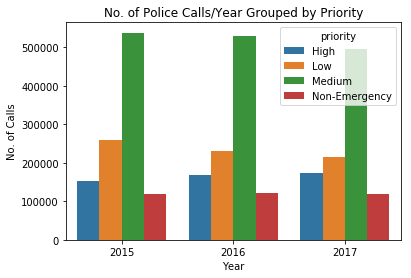

In [222]:
tt = 'No. of Police Calls/Year Grouped by Priority'
#ct = pd.crosstab(dfPriority.yr, dfPriority.priority)
stacked = ct.stack().reset_index().rename(columns={0:'val'})
bp = sns.barplot(x=stacked.yr, y=stacked.val, hue=stacked.priority)
bp.set(xlabel='Year', ylabel='No. of Calls', title=tt)

In [223]:
#Note to Milad/Me: Maybe do a yearly instead of monthly percentage (normalize) on priority.
#Note to Milad/Me: Maybe do a yearly instead of monthly percentage (normalize) on priority.
#Note to Milad/Me: Maybe do a yearly instead of monthly percentage (normalize) on priority.
#Note to Milad/Me: Maybe do a yearly instead of monthly percentage (normalize) on priority.

#df911.pivot_table(index=['yr', 'mo', 'dy'], columns= 'priority',aggfunc='size', fill_value=0)
ct = pd.crosstab(index=[dfPriority.yr, dfPriority.mo], columns=dfPriority.priority,
            rownames=['Year', 'Month'], colnames=['Priority'])

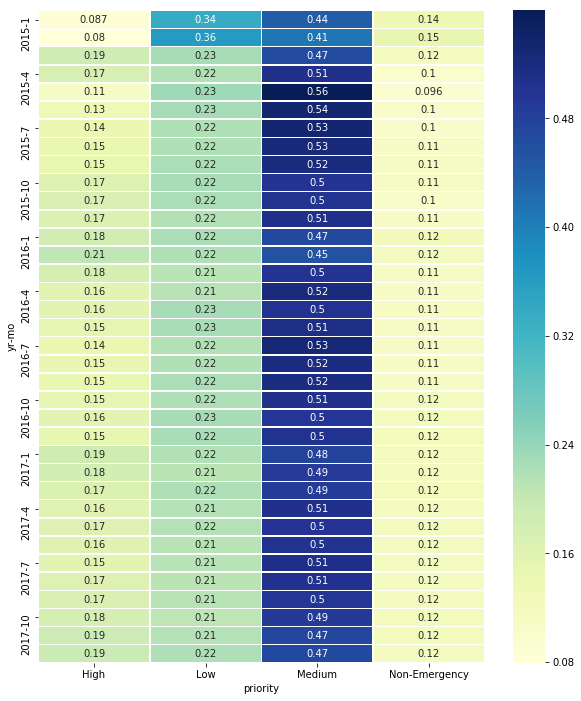

In [224]:
#
tt = 'No. of Police Calls/Year Grouped by Priority'
plt.figure(figsize=(10,12)) # %b/%Y; {:0<4.0f}; {:+.2f}

ax = sns.heatmap(pd.crosstab([dfPriority.yr, dfPriority.mo], [dfPriority.priority], normalize='index')
        , yticklabels=3, cmap="YlGnBu", annot=True, cbar=True, linewidths=.5 )#, fmt="{:+.2f}")

#df911.shape = wrangled #(3123855, 7)
dfCallType = pd.DataFrame(df911, columns=['priority', 'callType','yr', 'dy'])
dfCallType.head() #chk

##6g Work only on top 5 callType
###At this point, df911 has been wrangled already on the callType values which affected 
#the priority totals. So, from 6e,...

In [248]:
#SUB: #94: From cleaned up df911
##from 6e Work only on top 5 calType(S): [01/2015, 01/2016, 01/2017] =  
dfCallType = pd.concat([df9115, df9116, df9117]) # 248503 dfCallTypeDistrict
dfCallType = pd.DataFrame(dfCallType, columns=['callType', 'priority', 'district','yr', 'dy'])
dfCallType.head() #chk

,callType,priority,district,yr,dy
1106565,DISCHRG FIREARM,High,NW,2015,1
357881,SHOOTING,High,SW,2015,1
359329,OTHER,Low,SW,2015,1
359125,SUBJECT STOP,Low,SW,2015,1
359340,DISCHRG FIREARM,High,SW,2015,1


In [249]:
dfCallType.callType.value_counts().head(5)  #shape=(248503, 5) #top 5
# 911/NO VOICE=42105 TRAFFIC STOP=22486 DISORDERLY=19108 COMMON ASSAULT=10380 AUTO ACCIDENT=9855

911/NO VOICE      42105
TRAFFIC STOP      22486
DISORDERLY        19108
COMMON ASSAULT    10380
AUTO ACCIDENT      9855
Name: callType, dtype: int64

In [250]:
ctList = ['911/NO VOICE','TRAFFIC STOP','DISORDERLY','COMMON ASSAULT','AUTO ACCIDENT']
dfCallType = dfCallType[dfCallType.callType.isin(ctList)] #shape=(103934, 5)

In [251]:
dfCallType.callType.value_counts()  #chk, just the top 5

911/NO VOICE      42105
TRAFFIC STOP      22486
DISORDERLY        19108
COMMON ASSAULT    10380
AUTO ACCIDENT      9855
Name: callType, dtype: int64

In [265]:
ct = pd.crosstab(dfCallType.yr, dfCallType.callType, rownames=['Jan/Year'], colnames=['CallType'])
ct  #chk. Top 5 callType:   <<<END>>> #priority district callType dT yr mo dy.

CallType,911/NO VOICE,AUTO ACCIDENT,COMMON ASSAULT,DISORDERLY,TRAFFIC STOP
Jan/Year,,,,,
2015,15935,3003,3156,5879,9449
2016,13449,3317,3431,6506,6557
2017,12721,3535,3793,6723,6480


[Text(0,0.5,'No. of Calls'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'No. of Police Calls/Year (Month of January) Grouped by CallType')]

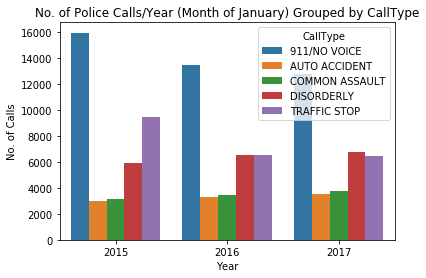

In [271]:
tt = 'No. of Police Calls/Year (Month of January) Grouped by CallType'
stacked = ct.stack().reset_index().rename(columns={0:'val'})
bp = sns.barplot(x=stacked['Jan/Year'], y=stacked.val, hue=stacked.CallType)
bp.set(xlabel='Year', ylabel='No. of Calls', title=tt)

#6a   ) dfCallTypeDistrict (Jan/2015, Jan/2016, Jan/2017; daily totals). Now, pull/filter only months of Jan for 3 yrs(2015, 2016, 2017)='01/2015','01/2016','01/2017'. Then, concatenate them.

In [ ]:
df911.priority.value_counts().head() #Medium=1879930 Low=858596 High=641406 Non-Emergency=469209 Out of Service=954

#6b) dfCallType (full years of 2015, 2016, 2017; monthly totals)

In [ ]:
dfPriority = df911.loc[(df911.dT >= '01/2015') & (df911.dT < '01/2018')]
dfPriority.tail() #chk  # 84422; location 82645

In [ ]:
df911.callType = df911.callType.str.upper()
df911.callType .value_counts()
#911/NO  VOICE    572935 DISORDERLY          351504 TRAFFIC STOP        242516 
#COMMON ASSAULT      172651 AUTO ACCIDENT       162557 NARCOTICSOUTSIDE    143029 OTHER               123083
#SILENT ALARM        121837 FAMILY DISTURB       99484 

In [ ]:
ctCounts = df911.callType.value_counts()

In [ ]:
df911.callType.unique() #['DISCHRG FIREARM', 'SHOOTING', 'OTHER', ..., 'CLD', 'ALLEDGED', 'PRTECT ORDER']
df911.callType.nunique() #9203

In [ ]:
df911.groupby(['yr', 'mo', 'dy', 'priority']).size().unstack(fill_value=0)
df911.pivot_table(index=['yr', 'mo', 'dy'], columns= 'priority',aggfunc='size', fill_value=0)
df911.crosstab([df911.yr, df911.mo, df911.dy], df911.priority)

## EDA Section:

#1)=#6 What district has the most <High> Priority calls for (Jan/2015, Jan/2016, Jan/2017) (no graph)?
#2) What is the most Priority Calls (High, Medium, Low, Non-Emergency) for 3 years (2015-2017)?
#3)=#7 What is the Top 5 CallTypes for (Jan/2015, Jan/2016, Jan/2017)?
#4) What is the percentage of emergencies and non-emergencies are from a dataset?
#5)	What is the percentage are High Priority, Medium, and Low are from the emergency calls?
#6)	What is the district with the greatest number of High Priority calls?
#7)	What is the type of emergency that's mostly incurred?
#8)	Is there a correlation of the call priority to a district?
#9)	Is there a correlation of the call type (description column) to a district?
#10) Is there a correlation of the call type (description column) to a call priority?

#1)	What district has the most High Priority calls for (Jan/2015, Jan/2016, Jan/2017) (no graph)?
NOTE: Python code/graph already covered above in #6e. See also #6 below.

#2) What is the most Priority Calls (High, Medium, Low, Non-Emergency) for 3 years (2015-2017)?
NOTE: See Python code/graph in #5 below.
    
The Medium priority calls TOP the number of emergency calls at 56.6%, 57.0%, and 56.0% for years 2015, 2016, and 2017.

#3) What is the Top 5 CallTypes for (Jan/2015, Jan/2016, Jan/2017)?
NOTE: Python code/graph already covered above in #6g.  See also #7 below.

4)	What is the percentage of emergencies and non-emergencies are from a dataset?
#The dataset provides a priority of "Non-emergency", whereas there is no priority of "Emergency". 
Hence, I assume that all calls that are Non-emergencies could be categorized as "Emergency". In a mathematical formula, Emergency = High + Medium + Low.
NOTE: Python code/graph will follow below.

##6f Work only on top 4 priority:

#Based on #6f Barplot and Heatmap, Medium priority consistently topped the number of annual and monthly calls.
###   WILL NEED ANOTHER CHART here, based from the formula above.

[Text(0,0.5,'No. of Calls'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'No. of Police Calls/Year Grouped by Priority')]

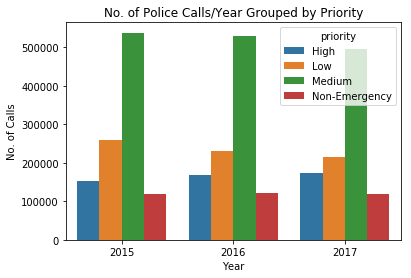

In [272]:
#Refresh calculation and graph:
tt = 'No. of Police Calls/Year Grouped by Priority'
ct = pd.crosstab(dfPriority.yr, dfPriority.priority)
stacked = ct.stack().reset_index().rename(columns={0:'val'})
bp = sns.barplot(x=stacked.yr, y=stacked.val, hue=stacked.priority)
bp.set(xlabel='Year', ylabel='No. of Calls', title=tt)

In [273]:
ct # annual totals for High, Low, Medium, and Non-Emergency

priority,High,Low,Medium,Non-Emergency
yr,,,,
2015,153299,259217,538099,119389
2016,167525,231383,528347,121159
2017,173209,215302,494703,120048


In [274]:
#Calc Total Emergency, Totals(Emergency + Non-Emergency), Non-Emergency Percent and Emergency Percent. 
ct['Emergency'] = ct.High + ct.Low + ct.Medium
ct['Totals'] = ct.Emergency + ct['Non-Emergency']
ct['EmerPct'] = ct.Emergency / ct.Totals * 100
ct['NonEPct'] = ct['Non-Emergency'] / ct.Totals * 100
ct

priority,High,Low,Medium,Non-Emergency,Emergency,Totals,EmerPct,NonEPct
yr,,,,,,,,
2015,153299,259217,538099,119389,950615,1070004,88.842191,11.157809
2016,167525,231383,528347,121159,927255,1048414,88.443592,11.556408
2017,173209,215302,494703,120048,883214,1003262,88.034232,11.965768


5)	What is the percentage of High Priority, Medium, and Low are from the emergency calls?
#Based from the assumption above, 
#a) HighPct   = High / Emergency * 100
#b) MediumPct = Medium / Emergency * 100
#c) LowPct    = Low / Emergency * 100 
NOTE: Python code/graph will follow below.
#Formula from #4 question above:
    Emergency = High + Medium + Low.

In [277]:
#Now, based from the dataset (ct) above, calculate the percentages of High, Medium, and Low priority calls.
ct['HighPct'] = ct.High / ct.Emergency * 100
ct['MediumPct'] = ct.Medium / ct.Emergency * 100
ct['LowPct'] = ct.Low / ct.Emergency * 100
dfPriorityPct = ct.copy()
dfPriorityPct

priority,High,Low,Medium,Non-Emergency,Emergency,Totals,EmerPct,NonEPct,HighPct,MediumPct,LowPct
yr,,,,,,,,,,,
2015,153299,259217,538099,119389,950615,1070004,88.842191,11.157809,16.126297,56.605355,27.268347
2016,167525,231383,528347,121159,927255,1048414,88.443592,11.556408,18.066767,56.979687,24.953546
2017,173209,215302,494703,120048,883214,1003262,88.034232,11.965768,19.611215,56.011680,24.377105


Looking at the chart above, we can observe that:

(1) The High priority calls has the LOWEST number of emergency calls at 16.1%, 18.0%, and 19.6% for years 2015, 2016, and 2017.

(2) The Medium priority calls TOP the number of emergency calls at 56.6%, 57.0%, and 56.0% for years 2015, 2016, and 2017.

(3) The Low priority calls has the SECOND most number of emergency calls at 27.3%, 25.0%, and 24.4% for years 2015, 2016, and 2017.

6)	What is the district with the greatest number of High Priority calls?

In [ ]:
#From the District crosstab chart above in #6e:
##NE (1149) has the highest High priority calls for year 2015. 
##NE (2444) has the highest High priority calls for year 2016. 
##SE (2247) has the highest High priority calls for year 2017. 
##NE (5814) has the highest High priority calls for all 3 years. 

7)	What is the type of emergency (reason for the call OR callType) that's mostly incurred?

In [ ]:
#From the callType crosstab chart above in #6g:
#911/No Voice is the #1 emergency incurred for 3 consecutive years (2015-2017). This cannot be exactly
###determined what's the reason for the call, except that the caller is not able to talk for whatever reason.
#Traffic Stop is the #2 for 2015, a tie for #2 with Disorderly in 2016, and comes #3 in 2017.
#Disorderly is the #3 for 2015, a tie for #2 with Disorderly in 2016, and comes #2 in 2017.

8)	Is there a correlation of the call priority to a district?

In [ ]:
NOTE to Milad:  Can this question be answered in Capstone Project #2?
NOTE to Milad:  Can this question be answered in Capstone Project #2?
NOTE to Milad:  Can this question be answered in Capstone Project #2?

9)	Is there a correlation of the call type (description column) to a district?

In [ ]:
NOTE to Milad:  Can this question be answered in Capstone Project #2?
NOTE to Milad:  Can this question be answered in Capstone Project #2?
NOTE to Milad:  Can this question be answered in Capstone Project #2?

10)	Is there a correlation of the call type (description column) to a call priority?

In [ ]:
NOTE to Milad:  Can this question be answered in Capstone Project #2?
NOTE to Milad:  Can this question be answered in Capstone Project #2?
NOTE to Milad:  Can this question be answered in Capstone Project #2?

# END> _ END> _ END> _ END> _ END> _ END>  

# STOP! STOP! STOP! STOP! STOP! STOP! STOP!

# Codes below were initially done in 1st draft...


In [ ]:
sns.countplot(data=df911A, x='yr', hue='district') #, palette='viridis')
plt.title('Police Calls of All Districts on the Month of January for 3 Years (2015-2017).')
plt.xlabel('Year (Month of January)')
plt.ylabel('Number of Calls')

#x Police Calls of the Top 5 Districts on the Month of January for 3 Years (2015-2017).

In [ ]:
dfD5  =  df911A.query('district in ("NE", "SW", "SE", "SD", "CD")')
sns.countplot(data=dfD5, x='yr', hue='district')
plt.title('Police Calls of the Top 5 Districts on the Month of January for 3 Years (2015-2017).')
plt.xlabel('Year (Month of January)')
plt.ylabel('Number of Calls')

In [ ]:
sns.countplot(data=df911A, x='callType', palette='viridis')

# It appears that the callType (description) values need to be cleaned.

In [ ]:
sns.countplot(x='yr', data=df911A, hue='priority') 

In [ ]:
df911A['DayOfWeek']= df911A['dT'].apply(lambda tid: tid.dayofweek)
df911A.head()

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df911A['DayOfWeek'] = df911A['DayOfWeek'].map(dmap)
df911A.head()

#2015 Police Calls Prioritized on the Day Of Week. 

In [ ]:
sns.countplot(x="DayOfWeek", data=df911A.loc[df911A.yr == 2015], hue='priority')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#2016 Police Calls Prioritized on the Day Of Week. 

In [ ]:
sns.countplot(x="DayOfWeek", data=df911A.loc[df911A.yr == 2016], hue='priority')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#2017 Police Calls Prioritized on the Day Of Week. 

In [ ]:
sns.countplot(x="DayOfWeek", data=df911A.loc[df911A.yr == 2017], hue='priority')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
sns.countplot(x="DayOfWeek", data=df911A, hue='priority')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#2015 Police Calls Prioritized (with High, Medium, Low) on the Day Of the Month (January).

In [ ]:
dfP3  =  df911A.query('priority in ("High", "Medium", "Low")')
sns.countplot(x='dy', data=dfP3.loc[dfP3.yr == 2015], hue='priority')
plt.title('#Jan/2015 Police Calls Prioritized (High, Medium, Low) on the Day Of the Month.')
plt.xlabel('Day of the Month (Jan)')
plt.ylabel('Number of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.tight_layout()
#dx.head() #chk

#2016 Police Calls Prioritized (with High, Medium, Low) on the Day Of the Month (January).

In [ ]:
sns.countplot(x='dy', data=dfP3.loc[dfP3.yr == 2016], hue='priority')
plt.title('#Jan/2016 Police Calls Prioritized (High, Medium, Low) on the Day Of the Month.')
plt.xlabel('Day of the Month (Jan)')
plt.ylabel('Number of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
#2017 Police Calls Prioritized (with High, Medium, Low) on the Day Of the Month (January).
911/NO  VOICE     26168
Traffic Stop      22486
911/No Voice      15935
DISORDERLY        13229
COMMON ASSAULT     7224

In [ ]:
dfT5  =  df911A.query('callType in ("911/NO  VOICE", "Traffic Stop", "911/No Voice", "DISORDERLY", "COMMON ASSAULT")')
dfT5.head()

In [ ]:
dfT5[dfT5.yr==2017].groupby('dy').count()['callType'].plot()

#dfT5[dfT5['callType']=='Traffic Stop'].groupby('dy').count()['callType'].plot()
#sns.countplot(x='dy', data=dfP3.loc[dfP3.yr == 2017], hue='priority')
plt.title('#Jan/2017 Police Calls Category (Traffic, Disorderly, Assault, etc) on each Day Of the Month.')
plt.xlabel('Day of the Month (Jan)')
plt.ylabel('Number of Calls')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
dfD5  =  df911A.query('district in ("NE", "SW", "SE", "SD", "CD")')
sns.countplot(data=dfD5, x='yr', hue='district')
#plt.title('Police Calls of the Top 5 Districts on the Month of January for 3 Years (2015-2017).')
#plt.xlabel('Year (Month of January)')
#plt.ylabel('Number of Calls')

In [ ]:
sns.countplot(x='dy', data=dfD5.loc[dfP3.yr == 2017], hue='callType')
plt.title('#Jan/2017 Police Calls Prioritized (High, Medium, Low) on the Day Of the Month.')
plt.xlabel('Day of the Month (Jan)')
plt.ylabel('Number of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# STOP! 
# WORK AREA BELOW:
#If you need to know how many rows there are with "one or more NaNs":
df.isnull().T.any().T.sum()

#Or if you need to pull out these rows and examine them:
nan_rows = df[df.isnull().T.any().T]

df.isnull().any().any() #.any() will tell you if any of the above are True

#to get the total number of NaN values in the DataFrame:
df.isnull().sum().sum()

# Which rows have NaNs in a specific column:
nan_rows = df[df['column'].isnull()]

#To find out which rows do not have NaNs in a specific column: 
non_nan_rows = df[df['column'].notnull()]

#To find out which rows have NaNs:
nan_rows = df[df.isnull().any(1)] #any(axis=1)

T(all(isnan(T{:,2:4}),2),:)

In [ ]:
# Set the index, Sort
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
df911A.set_index(['yr', 'dy'], drop=True)
df911A.sort_values(['yr', 'dy'], inplace=True)
df911A.head(6)

In [ ]:
#df = df911A.groupby(['yr', 'dy', 'district']).count()                # syntax OK
#df = df911A.groupby(['yr', 'dy', 'district'])['callDateTime'].sum() # syntax !OK
#df = df911A.groupby(['yr', 'dy', 'district'])['callDateTime'].count() # syntax OK
#df = df911A.crosstab([df.yr, df.dy], df.priority) #'])['callDateTime'].count() # syntax OK
#import timeit #%%timeit # do it 100x; -n 100

df = df911A.groupby(['yr', 'dy', 'priority'])['callDateTime'].count() # syntax OK
df.columns = ['yr', 'dy', 'priority', 'count']
df

In [ ]:
df.columns = ['yr', 'dy', 'priority', 'counts']
df.columns

In [ ]:
#plt.plot(df9115.yr, df9115.priority, color='red')
#plt.plot(df9116.yr, df9116.priority, color='green')
#plt.plot(df9117.yr, df9117.priority, color='blue')
#plt.axis((1990,2010,0,50))
#plt.plot(df911A.yr, df911A.priority, color='red')
#plt.plot([df911A.yr for yr in df911A.yr if df911A.yr == 2015], df911A.priority, color='red')
#plt.plot(df911A.loc[df911A.yr == 2015], df911A.priority, color='red')
#plt.plot(df911A.yr, df911A.priority, color='red')
#plt.plot(df911A.yr, df911A.priority, color='red')

plt.plot(df9115.yr, df9115.priority, color='red', label='Priority')
plt.plot(df9116.yr, df9116.priority, color='green', label='Priority')
plt.plot(df9117.yr, df9117.priority, color='blue', label='Priority')
plt.title('911 Police Calls - Priority by Year')
plt.ylabel('Priority')
plt.xlabel('Year')
plt.legend(loc='lower right')
plt.show()
# Save the figure as 'axis_limits.png'
#plt.savefig('axis_limits.png')

tt = 'No. of Police Calls/Year (Month of January) Grouped by Priority'
plt.figure(figsize=(10,12)) 
ax = sns.heatmap(pd.crosstab([dfPriority.yr, dfPriority.mo], [dfPriority.priority], normalize=True),
    yticklabels=3, cmap="YlGnBu", annot=True, cbar=True, linewidths=.5)#, fmt="%b/%Y") 

#import timeit ##, fill_value=0) #, aggfunc = 'size'
#%%timeit df = df911A.pivot_table(['yr', 'dy'], columns = 'priority') #, fill_value=0) #, aggfunc = 'size'
df = df911A.pivot_table(index=['yr'], columns = ['dy'], aggfunc = [np.count] 
 , values = 'callDateTime', fill_na = 0, margins = True, dropna = True)
df
#stacked = ct.stack().reset_index().rename(columns={0:'val'})
#bp = sns.barplot(stacked.index, stacked.val, hue=stacked.columns)
#bp.set(xlabel='Year', ylabel='No. of Calls', title=tt)
#plt.figure(figsize=(16,5)) 
#months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#ct = ct.reindex_axis(months)
#sns.heatmap(ct, annot=True) xlabel='Priority', ylabels='Month/Year',
#cmap=Blues, Greens, BuPu, YlGnBu, BuGn_r/reverse, BuGn_d/dark cubehelix/8
#ax.set_yticklabels([i.strftime("%Y-%m-%d %H:%M:%S") for i in dfPriority.index], rotation=0)

In [ ]:
#df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
#g = sns.relplot(x="hr", y="callDateTime", kind="line", data=df)
#g.fig.autofmt_xdate()

g = sns.lmplot(x='yr', y='priority', data=df)# .loc[df.yr == '2015']) #kind="line", 
#err: AttributeError: 'Series' object has no attribute 'yr'

#g = sns.lmplot(x=['yr','dy'], y='priority', data=df)# .loc[df.yr == '2015']) #kind="line", 
#TypeError: '<' not supported between instances of 'str' and 'list'

g = sns.FacetGrid(df, row='priority', col='yr')
g.map(sns.distplot, 'dy')
plt.show()
'''
g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, "age")
plt.show()'''#plt.plot(df9115.yr, df9115.callType, color='red', label='callType')
#plt.plot(df9116.yr, df9116.callType, color='green', label='callType')
plt.plot(df9117.yr, df9117.callType.count(), color='blue', label='callType')
plt.title('911 Police Calls - callType by Year')
plt.ylabel('callType')
plt.xlabel('Year')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df.groupby(['id', 'group', 'term']).count()

In [ ]:
plt.plot(df911A.yr, df911A.loc[df911A.priority=='High'], color='red', label='Priority')
#plt.plot(df9116.yr, df9116.priority, color='green', label='Priority')
#plt.plot(df9117.yr, df9117.priority, color='blue', label='Priority')
plt.title('911 Police Calls - Priority by Year')
plt.ylabel('Priority')
plt.xlabel('Year')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hour, direction = np.meshgrid(np.arange(24), np.arange(1,3))
df = pd.DataFrame({"hour": hour.flatten(), "direction": direction.flatten()})
df["hourly_avg_count"] = np.random.randint(14,30, size=len(df))

plt.figure(figsize=(12,8))
sns.tsplot(df, time='hour', unit = "direction", 
               condition='direction', value='hourly_avg_count')

plt.show()

#CLIP... CLIP... CLIP... CLIP... CLIP...
#=============================================
df911A.isnull().T.any().T.sum() #rows=61897
df911A[df911A.isnull().T.any().T] #61897 rows/10 col; Nan latlong
df911A.isnull().any().any() #True , any of the rows/cols is True
df911A.isnull().count().count() #=10??? #.sum().sum()
df911A[df911A['lat'].isnull()] #which rows have NaNs in a specific col, #nan_rows
df911A[df911A['long'].isnull()] #61897 #nan_rows
df911A.count()  #248503
df911A[df911A['lat'].notnull()]  #186606 
df911A[df911A.isnull().any(1)]    #61897 
df911A.callType.unique()  
#array(['Dischrg Firearm', 'Shooting', 'Other', ..., 'SCREAMING WOMAN', 
  'SERVE PEACE ORDE', 'OVERDOSE /POSS'], dtype=object)
df911A.district.unique()  
#array(['NW', 'SW', 'NE', 'SD', 'ED', 'WD', 'HP', 'SE', 'ND', 'CD', 'SS',
  'CW', 'TRU', 'INFO', 'FIR1', 'EVT2'], dtype=object) #=16
df911A.priority.unique()  
#array(['High', 'Low', 'Medium', 'Non-Emergency', 'Out of Service',
  'Emergency'], dtype=object)
df911A.priority.value_counts()  #<<< 
 #Medium            114701 #Low                64507 #High               37790 
 #Non-Emergency      31269 #Out of Service       174 #Emergency             62
df911A.priority.value_counts()  #<<< 

for series: df911A(all(isnan(df911A{:,2:4}),2),:)
df1['Hour']= df1['timeStamp'].apply(lambda tid: tid.hour)
df1['Month']= df1['timeStamp'].apply(lambda tid: tid.month)
df1['Day of Week']= df1['timeStamp'].apply(lambda tid: tid.dayofweek)
df1.head()

#import timeit #%%timeit # do it 100x; -n 100
#df.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#df911A.district.value_counts()  #<<< 
 NE      37615 SW      27717 SE      27609 SD      27006 CD      26087
 WD      25023 NW      24655
df911A.callType.value_counts()  #<<< 
Upper/lower case: ex: 911/No Voice, COMMON ASSAULT, Other, AUTO ACCIDENT, *INVESTIGATE
Del Row: TEST CALL, 
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])   

df911A.district.nunique() # 16 
#array(['NW', 'SW', 'NE', 'SD', 'ED', 'WD', 'HP', 'SE', 'ND', 'CD', 'SS',
  'CW', 'TRU', 'INFO', 'FIR1', 'EVT2'], dtype=object) #=16
  
  
  df911.isnull().T.any().T.sum() #rows=61897, 6655
plt.figure(figsize=(10,12)) 
ax = sns.heatmap(pd.crosstab([dfPriority.yr, dfPriority.mo], [dfPriority.priority]),yticklabels=3,
    cmap="YlGnBu", annot=True, cbar=True, linewidths=.50, fmt="{:+6f}") #, normalize=True
#df.style.format({'B': "{:0<4.0f}", 'D': '{:+.2f}'})
cm = sns.light_palette("green", as_cmap=True)

s = df.style.background_gradient(cmap=cm)


#8 Calc 4 cols by parsing from location = [street, cityState, lat, long]

df911A['street'] = df911A.location.str.split('\n').str[0]
df911A['cityState'] = df911A.location.str.split('\n').str[1]
df911A['latLong'] = df911A.location.str.split('\n').str[2]
  #temp col. will parse lat and long from here. >>># Not run as of yet, for testing/verifying
df911A['latLong'] = df911A.latLong.str.replace('(','')
df911A['latLong'] = df911A.latLong.str.replace(')','')
df911A['lat'] = df911A.latLong.str.split(',').str[0]
df911A['long'] = df911A.latLong.str.split(',').str[1]
df911A.tail() #chk

#import timeit #%timeit #13min 15s ± 6.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
df911['dT'] =pd.to_datetime(df911.callDateTime)

#3a# 
df911.to_csv('Data/w911PoliceCalls_BaltimoreMD_dTc.csv', sep=',', encoding='utf-8')

c911x = pd.read_csv('Data/w911PoliceCalls_BaltimoreMD_dTc.csv')

'''
df.groupby(['id', 'group', 'term']).count()
print (pd.crosstab([df.id, df.group], df.term))
df.groupby(['id', 'group', 'term'])['term'].size().unstack(fill_value=0)
df = pd.concat([df]*10000).reset_index(drop=True)

In [48]: %timeit (df.groupby(['id', 'group', 'term']).size().unstack(fill_value=0))
100 loops, best of 3: 12.4 ms per loop

In [49]: %timeit (df.groupby(['id', 'group', 'term'])['term'].size().unstack(fill_value=0))
100 loops, best of 3: 12.2 ms per loop

df911.set_index('dT', drop=True)
df911.sort_values(by='dT', inplace=True)
df911.head(6) #chk
'''.

dfP3  =  df911A.query('priority in ("High", "Medium", "Low")')
sns.countplot(x='dy', data=dfP3.loc[dfP3.yr == 2015], hue='priority')

dfD5  =  df911A.query('district in ("NE", "SW", "SE", "SD", "CD")')
sns.countplot(data=dfD5, x='yr', hue='district')

byDate = df1.groupby(df1['Date']).count()['lat']
byDate.head()

dfDay.priority.plot(x='dy', hue='yr', kind='line')
plt.tight_layout()
#=============================================
CLIP... CLIP... CLIP... CLIP... CLIP... CLIP...

In [ ]:
#pd.crosstab(dfPnull.yr, dfPnull.priority) #priority district callType dT yr mo dy 
##ctList = ['COMMON ASSAULT','BURGLARY', 'DISORDERLY', 'ARMED PERSON', 'AGGRAV ASSAULT', 'LARCENCY', 'DESTRUCT PROPTY', 'DISCHRG FIREARM', 'FAMILY DISTURB', 'HIT AND RUN']
#pd.crosstab(dfPnull.yr, dfPnull.loc[dfPnull.callType.any() in ctList])
##pd.crosstab(dfPnull.yr, dfPnull.callType[dfPnull.callType.empty() in ctList])
#pd.crosstab(dfPnull.yr, dfPnull.callType)
#COMMON ASSAULT     1883 BURGLARY           1106 DISORDERLY          708 ARMED PERSON        338
#AGGRAV ASSAULT      296 LARCENCY            253 DESTRUCT PROPTY     253 DISCHRG FIREARM     216
#FAMILY DISTURB      203 HIT AND RUN         104

In [ ]:
df911.count()  #248503
df911.isnull().T.any().T.sum() #rows=61897
df911[df911A.isnull().T.any().T] #61897 rows/10 col; Nan latlong
df911.isnull().any().any() #True , any of the rows/cols is True
df911.isnull().count().count() #=10??? #.sum().sum()
df911[df911A['lat'].isnull()] #which rows have NaNs in a specific col, #nan_rows
df911[df911A['long'].isnull()] #61897 #nan_rows
df911[df911A['lat'].notnull()]  #186606 
df911[df911A.isnull().any(1)]    #61897 
df911.callType.unique()  
df911.pivot_table(index=['yr', 'mo', 'dy'], columns= 'priority',aggfunc='size', fill_value=0)
df911.crosstab([df911.yr, df911.mo, df911.dy], df911.priority)

In [ ]:
## (Once result above is verified correct,) Drop columns: location, latlong, callDateTime (string)

## temp/Skip for now
df911Acopy = df911A.copy() 
df911Acopy.tail() #chk. STILL WORK ON df911A

#9 Drop columns: callDateTime (string), location, latLong
df911A.drop(['callDateTime','location', 'latLong'], axis=1, inplace=True)
df911A.head()  #chk

#10 #Data wrangle: df911A
##a Empty/NULL
##b NaN
##c wrong values???

#11
#reindex on dT??? (datetime type), sort as needed. ['yr', 'dy']
df911A.set_index(['dT'], drop=True)
df911A.sort_values(['dT'], inplace=True)
df911A.head(6)